In [1]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Célula de imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import learning_curve
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

In [3]:
def curva_aprendizado(estimador, X, y):
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    pontos, desempenho_in, desempenho_out = learning_curve(estimador, X, y, train_sizes=sizes)
    
    media_in = np.mean(desempenho_in, axis=1)
    desvio_in = np.std(desempenho_in, axis=1)
    media_out = np.mean(desempenho_out, axis=1)
    desvio_out = np.std(desempenho_out, axis=1)
    
    plt.plot(pontos, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(pontos, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(pontos, media_in - desvio_in,
                     media_in + desvio_in, color='red', alpha=0.1)
    plt.fill_between(pontos, media_out - desvio_out,
                     media_out + desvio_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [5]:
dados = pd.read_csv('titanic.csv')
copia = dados.copy()
dados.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S


In [8]:
dados.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
dados.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
518,1,2,female,36.0,1,0,26.0000,NaN,S
451,0,3,male,NaN,1,0,19.9667,NaN,S
723,0,2,male,50.0,0,0,13.0000,NaN,S
137,0,1,male,37.0,1,0,53.1000,C123,S
432,1,2,female,42.0,1,0,26.0000,NaN,S


In [9]:
dados['Family'] = dados['SibSp'] + dados['Parch']
dados.drop(['SibSp', 'Parch'], axis=1, inplace=True)
dados.sample(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
294,0,3,male,24.0,7.8958,NaN,S,0
357,0,2,female,38.0,13.0000,NaN,S,0
516,1,2,female,34.0,10.5000,F33,S,0
593,0,3,female,NaN,7.7500,NaN,Q,2
346,1,2,female,40.0,13.0000,NaN,S,0


In [14]:
dados.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      0
Family        0
dtype: int64

In [12]:
dados.drop('Cabin', axis=1, inplace=True)

In [16]:
dados['Embarked'].fillna("NNN", inplace=True)
dados = dados.loc[dados['Embarked'] != "NNN", :]

In [17]:
dados['Title'] = 0

for i in dados:
    dados['Title'] = copia['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
dados.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
468,0,3,male,NaN,7.725,Q,0,Mr
582,0,2,male,54.0,26.000,S,0,Mr
257,1,1,female,30.0,86.500,S,0,Miss
346,1,2,female,40.0,13.000,S,0,Miss
328,1,3,female,31.0,20.525,S,2,Mrs


In [18]:
dados['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

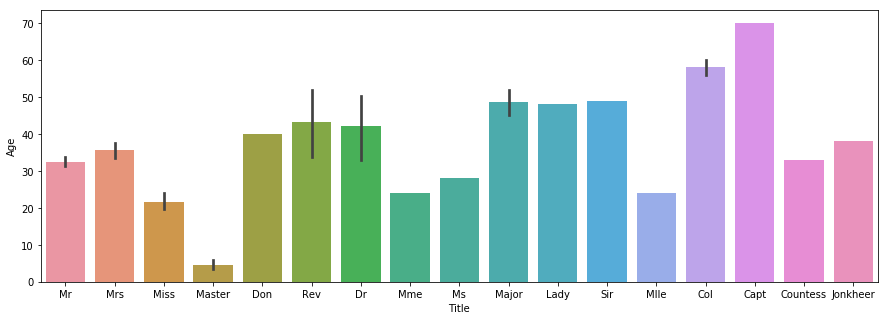

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x=dados['Title'], y=dados['Age'])

In [24]:
medias_idade = dados.groupby('Title')['Age'].mean().to_dict()
medias_idade

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.662068965517243,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.654205607476634,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [27]:
sem_idade = dados.loc[np.isnan(dados['Age'])].index
dados.loc[sem_idade, 'Age'] = dados['Title'].loc[sem_idade].map(medias_idade)

In [28]:
dados.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Title       0
dtype: int64

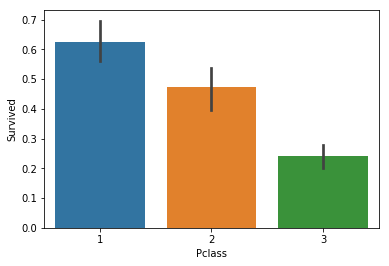

In [30]:
sns.barplot(x=dados['Pclass'], y=dados['Survived'])

In [31]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

dados['Title'] = dados['Title'].map(titles_dict)

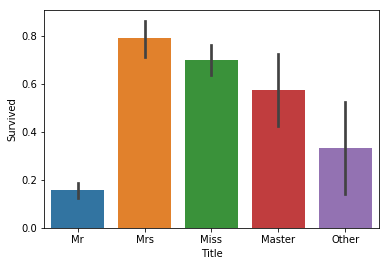

In [32]:
sns.barplot(x=dados['Title'], y=dados['Survived'])

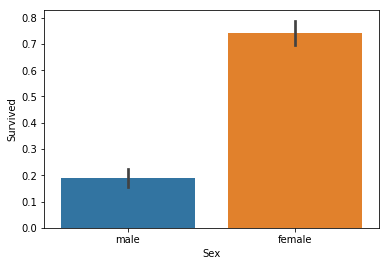

In [33]:
sns.barplot(x=dados['Sex'], y=dados['Survived'])

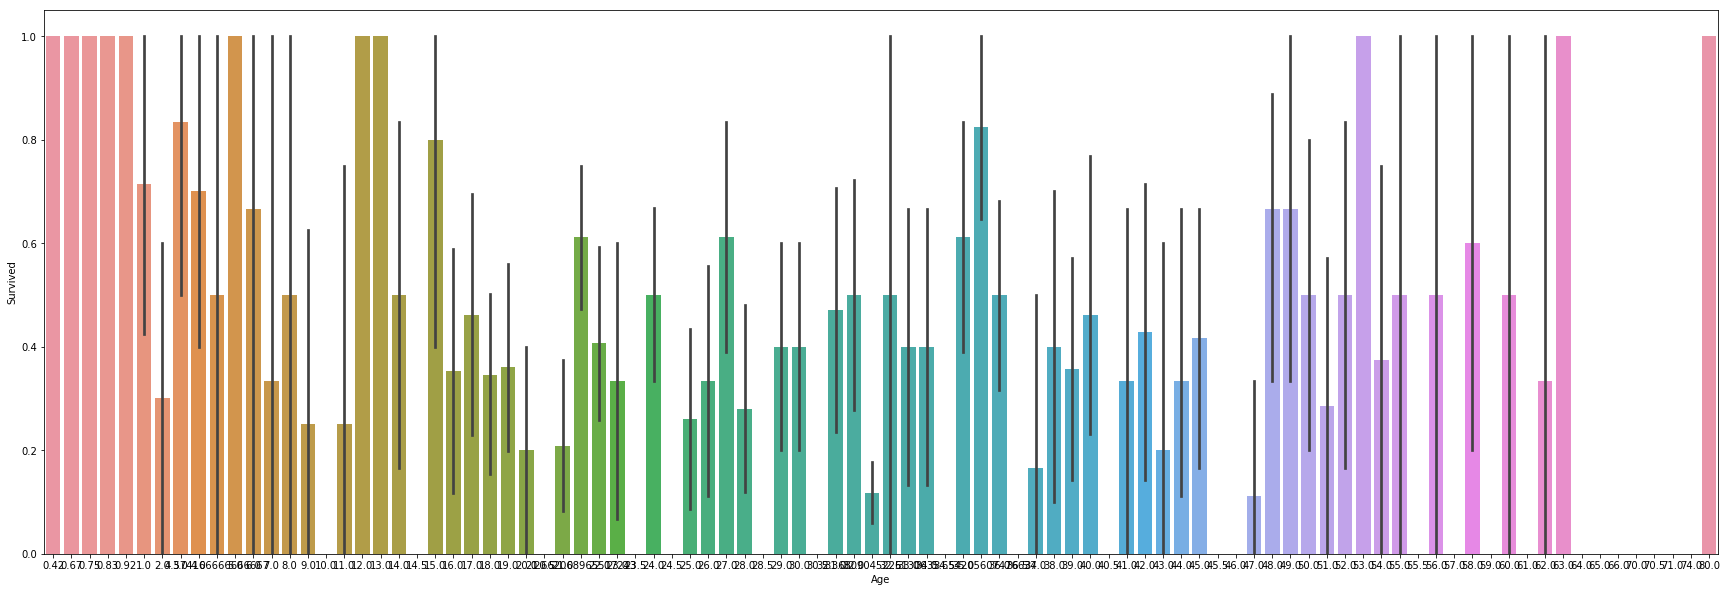

In [36]:
plt.figure(figsize=(30, 10))
sns.barplot(x=dados['Age'], y=dados['Survived'])

In [38]:
dados['Age'] = pd.cut(dados['Age'], bins=[0, 14, 50, 200], labels=['C', 'A', 'V'])